# Pooling-imputation performance from real bead chip data

Process and plots results output from bcftools stats.
Data set: pooled-imputed bead chip

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

os.chdir('/home/camille/PoolImpHuman/data/20200706')
filestats = os.path.join(os.getcwd(), 'filestats.vchk')

In [2]:
from scripts.VCFPooling.poolSNPs import BCFstatsUtils as bcfstats
from scripts.VCFPooling.poolSNPs.metrics import BCFstatsQuality as bcfqual

gcss = bcfstats.get_table_dict(filestats, "GCsS")
sn = bcfstats.get_table_dataframe(filestats, "SN")
sn = sn.drop_duplicates()
sn.set_index(keys='key', drop=True, inplace=True)
sn = sn.astype(int)

n_samples = sn.loc['number of samples:'].to_numpy()[0]
print(n_samples)

['/home/camille/PoolImpHuman/data/20200706', '/home/camille/1000Genomes', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/setuptools-40.8.0-py3.6.egg', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/pip-19.0.3-py3.6.egg', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/IPython/extensions', '/home/camille/.ipython']
[['# GCsS', '[2]id', '[3]sample', '[4]non-reference discordance rate', '[5]RR Hom matches', '[6]RA Het matches', '[7]AA Hom matches', '[8]RR Hom mismatches', '[9]RA Het mismatches', '[10]AA Hom mismatches', '[11]dosage r-squared'], ['GCsS', '2', 'NA18960', '60.921', '1656256', '12927', '19532', '8985', '29518', '12097', '0.553259'], ['GCsS', '2', 'HG02546', '52.116', '1635510', '32459', '17247', '9939', '30037', '14123', '0.577328'], ['GCsS', '2', 'HG03780', '62.557', '1654917', '14

In [3]:
genos = {0: 'RR Hom', 1: 'RA Het', 2: 'AA Hom'}

gcsaf = bcfstats.get_table_dataframe(filestats, "GCsAF")
af = bcfstats.get_table_dataframe(filestats, "AF")

myaf = af.iloc[:, 1].to_frame().join(gcsaf)
myaf.drop('number of genotypes', axis=1, inplace=True)
myaf = myaf.astype(float)
myaf['pct SNPs'] = myaf['number of SNPs'].apply(lambda x: x / myaf['number of SNPs'].sum())

# Count (mis)matches
# Represent number of SNPs as bars?
myaf['tot matches'] = myaf['RR Hom matches'] + myaf['RA Het matches'] + myaf['AA Hom matches']
myaf['pct matches'] = myaf['tot matches'] / (n_samples * myaf['number of SNPs'])
myaf['tot mismatches'] = myaf['RR Hom mismatches'] + myaf['RA Het mismatches'] + myaf['AA Hom mismatches']
myaf['pct mismatches'] = myaf['tot mismatches'] / (n_samples * myaf['number of SNPs'])

myaf.head(12)

[['# GCsAF', '[2]id', '[3]allele frequency', '[4]RR Hom matches', '[5]RA Het matches', '[6]AA Hom matches', '[7]RR Hom mismatches', '[8]RA Het mismatches', '[9]AA Hom mismatches', '[10]dosage r-squared', '[11]number of genotypes'], ['GCsAF', '2', '0.010000', '305529793', '677773', '71', '8402', '107043', '13638', '0.873959', '366675600'], ['GCsAF', '2', '0.060000', '19229248', '920882', '9107', '215474', '776008', '117121', '0.403230', '21267840'], ['GCsAF', '2', '0.150000', '5978123', '394404', '13095', '212032', '1457278', '260588', '0.095257', '8315520'], ['GCsAF', '2', '0.250000', '2945202', '180424', '6720', '115156', '1559890', '402048', '0.025685', '5209440'], ['GCsAF', '2', '0.350000', '1580209', '247459', '17687', '173667', '1326571', '543367', '0.016730', '3888960'], ['GCsAF', '2', '0.450000', '607939', '577454', '85289', '416187', '814057', '616674', '0.011921', '3117600'], ['GCsAF', '2', '0.550000', '131625', '644144', '317512', '472990', '520073', '532536', '0.013388', '26

,number of SNPs,allele frequency,RR Hom matches,RA Het matches,AA Hom matches,RR Hom mismatches,RA Het mismatches,AA Hom mismatches,dosage r-squared,pct SNPs,tot matches,pct matches,tot mismatches,pct mismatches
0,1527815.0,0.01,305529793.0,677773.0,71.0,8402.0,107043.0,13638.0,0.873959,0.878400,306207637.0,0.835091,129083.0,0.000352
1,88616.0,0.06,19229248.0,920882.0,9107.0,215474.0,776008.0,117121.0,0.403230,0.050949,20159237.0,0.947874,1108603.0,0.052126
2,34648.0,0.15,5978123.0,394404.0,13095.0,212032.0,1457278.0,260588.0,0.095257,0.019920,6385622.0,0.767916,1929898.0,0.232084
3,21706.0,0.25,2945202.0,180424.0,6720.0,115156.0,1559890.0,402048.0,0.025685,0.012480,3132346.0,0.601283,2077094.0,0.398717
4,16204.0,0.35,1580209.0,247459.0,17687.0,173667.0,1326571.0,543367.0,0.016730,0.009316,1845355.0,0.474511,2043605.0,0.525489
5,12990.0,0.45,607939.0,577454.0,85289.0,416187.0,814057.0,616674.0,0.011921,0.007468,1270682.0,0.407583,1846918.0,0.592417
6,10912.0,0.55,131625.0,644144.0,317512.0,472990.0,520073.0,532536.0,0.013388,0.006274,1093281.0,0.417461,1525599.0,0.582539
7,7995.0,0.65,14947.0,201640.0,685819.0,264377.0,591275.0,160742.0,0.016147,0.004597,902406.0,0.470297,1016394.0,0.529703
8,7070.0,0.75,6652.0,80209.0,922286.0,133478.0,494417.0,59758.0,0.033838,0.004065,1009147.0,0.594735,687653.0,0.405265
9,5082.0,0.85,1801.0,59109.0,849930.0,40811.0,232762.0,35267.0,0.077136,0.002922,910840.0,0.746786,308840.0,0.253214


In [4]:
myaf.columns
counts = myaf['RR Hom matches'] + myaf['RA Het matches'] + myaf['AA Hom matches'] \
             + myaf['RR Hom mismatches'] + myaf['RA Het mismatches'] + myaf['AA Hom mismatches']

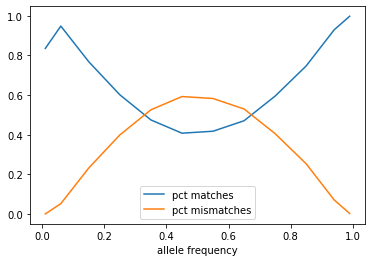

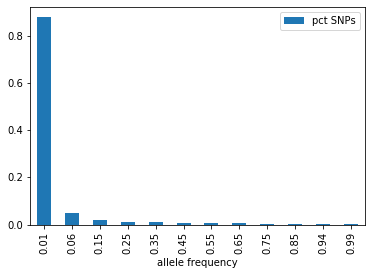

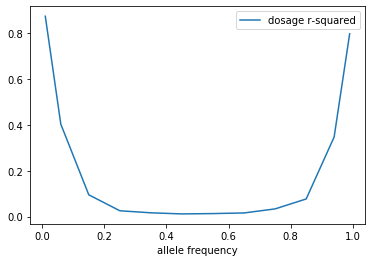

In [5]:
xaxis = 'allele frequency'
ycounts = ['RR Hom matches', 'RA Het matches', 'AA Hom matches', 
         'RR Hom mismatches', 'RA Het mismatches', 'AA Hom mismatches']
ypcts = ['pct matches', 'pct mismatches']
yextra = ['dosage r-squared']
myaf.plot(x=xaxis, y=ypcts)
myaf.plot.bar(x=xaxis, y='pct SNPs')
myaf.plot(x=xaxis, y=yextra)
plt.show()


In [6]:
nrds = bcfstats.get_table_dataframe(filestats, "NRDs")
nrds

[['# NRDs', '[2]id', '[3]NRD', '[4]Ref/Ref discordance', '[5]Ref/Alt discordance', '[6]Alt/Alt discordance'], ['NRDs', '2', '59.749858', '0.517222', '64.944305', '39.002853']]


,NRD,Ref/Ref discordance,Ref/Alt discordance,Alt/Alt discordance
0,59.749858,0.517222,64.944305,39.002853


In [7]:
mynrd = bcfqual.get_bin_nrd(filestats)
mynrd

[['# GCsAF', '[2]id', '[3]allele frequency', '[4]RR Hom matches', '[5]RA Het matches', '[6]AA Hom matches', '[7]RR Hom mismatches', '[8]RA Het mismatches', '[9]AA Hom mismatches', '[10]dosage r-squared', '[11]number of genotypes'], ['GCsAF', '2', '0.010000', '305529793', '677773', '71', '8402', '107043', '13638', '0.873959', '366675600'], ['GCsAF', '2', '0.060000', '19229248', '920882', '9107', '215474', '776008', '117121', '0.403230', '21267840'], ['GCsAF', '2', '0.150000', '5978123', '394404', '13095', '212032', '1457278', '260588', '0.095257', '8315520'], ['GCsAF', '2', '0.250000', '2945202', '180424', '6720', '115156', '1559890', '402048', '0.025685', '5209440'], ['GCsAF', '2', '0.350000', '1580209', '247459', '17687', '173667', '1326571', '543367', '0.016730', '3888960'], ['GCsAF', '2', '0.450000', '607939', '577454', '85289', '416187', '814057', '616674', '0.011921', '3117600'], ['GCsAF', '2', '0.550000', '131625', '644144', '317512', '472990', '520073', '532536', '0.013388', '26

,allele frequency,RR Hom matches,RA Het matches,AA Hom matches,RR Hom mismatches,RA Het mismatches,AA Hom mismatches,dosage r-squared,number of genotypes,tot matches,tot mismatches,NRD,RR Hom discordance,RA Het discordance,AA Hom discordance
0,0.01,305529793.0,677773.0,71.0,8402.0,107043.0,13638.0,0.873959,366675600.0,306207637.0,129083.0,0.159969,0.000027,0.136392,0.994821
1,0.06,19229248.0,920882.0,9107.0,215474.0,776008.0,117121.0,0.403230,21267840.0,20159237.0,1108603.0,0.543808,0.011081,0.457312,0.927853
2,0.15,5978123.0,394404.0,13095.0,212032.0,1457278.0,260588.0,0.095257,8315520.0,6385622.0,1929898.0,0.825661,0.034253,0.787002,0.952153
3,0.25,2945202.0,180424.0,6720.0,115156.0,1559890.0,402048.0,0.025685,5209440.0,3132346.0,2077094.0,0.917348,0.037628,0.896327,0.983560
4,0.35,1580209.0,247459.0,17687.0,173667.0,1326571.0,543367.0,0.016730,3888960.0,1845355.0,2043605.0,0.885156,0.099019,0.842786,0.968475
5,0.45,607939.0,577454.0,85289.0,416187.0,814057.0,616674.0,0.011921,3117600.0,1270682.0,1846918.0,0.735923,0.406383,0.585017,0.878499
6,0.55,131625.0,644144.0,317512.0,472990.0,520073.0,532536.0,0.013388,2618880.0,1093281.0,1525599.0,0.613367,0.782299,0.446715,0.626478
7,0.65,14947.0,201640.0,685819.0,264377.0,591275.0,160742.0,0.016147,1918800.0,902406.0,1016394.0,0.533862,0.946489,0.745698,0.189876
8,0.75,6652.0,80209.0,922286.0,133478.0,494417.0,59758.0,0.033838,1696800.0,1009147.0,687653.0,0.406860,0.952530,0.860415,0.060851
9,0.85,1801.0,59109.0,849930.0,40811.0,232762.0,35267.0,0.077136,1219680.0,910840.0,308840.0,0.253588,0.957735,0.797482,0.039841


In [8]:
myacc = bcfqual.get_bin_accuracy(filestats)
myacc

[['# GCsAF', '[2]id', '[3]allele frequency', '[4]RR Hom matches', '[5]RA Het matches', '[6]AA Hom matches', '[7]RR Hom mismatches', '[8]RA Het mismatches', '[9]AA Hom mismatches', '[10]dosage r-squared', '[11]number of genotypes'], ['GCsAF', '2', '0.010000', '305529793', '677773', '71', '8402', '107043', '13638', '0.873959', '366675600'], ['GCsAF', '2', '0.060000', '19229248', '920882', '9107', '215474', '776008', '117121', '0.403230', '21267840'], ['GCsAF', '2', '0.150000', '5978123', '394404', '13095', '212032', '1457278', '260588', '0.095257', '8315520'], ['GCsAF', '2', '0.250000', '2945202', '180424', '6720', '115156', '1559890', '402048', '0.025685', '5209440'], ['GCsAF', '2', '0.350000', '1580209', '247459', '17687', '173667', '1326571', '543367', '0.016730', '3888960'], ['GCsAF', '2', '0.450000', '607939', '577454', '85289', '416187', '814057', '616674', '0.011921', '3117600'], ['GCsAF', '2', '0.550000', '131625', '644144', '317512', '472990', '520073', '532536', '0.013388', '26

,allele frequency,RR Hom matches,RA Het matches,AA Hom matches,RR Hom mismatches,RA Het mismatches,AA Hom mismatches,dosage r-squared,number of genotypes,RR Hom accuracy,RA Het accuracy,AA Hom accuracy
0,0.01,305529793.0,677773.0,71.0,8402.0,107043.0,13638.0,0.873959,366675600.0,0.833243,0.001848,1.936316e-07
1,0.06,19229248.0,920882.0,9107.0,215474.0,776008.0,117121.0,0.403230,21267840.0,0.904147,0.043299,4.282052e-04
2,0.15,5978123.0,394404.0,13095.0,212032.0,1457278.0,260588.0,0.095257,8315520.0,0.718912,0.047430,1.574766e-03
3,0.25,2945202.0,180424.0,6720.0,115156.0,1559890.0,402048.0,0.025685,5209440.0,0.565359,0.034634,1.289966e-03
4,0.35,1580209.0,247459.0,17687.0,173667.0,1326571.0,543367.0,0.016730,3888960.0,0.406332,0.063631,4.548003e-03
5,0.45,607939.0,577454.0,85289.0,416187.0,814057.0,616674.0,0.011921,3117600.0,0.195002,0.185224,2.735726e-02
6,0.55,131625.0,644144.0,317512.0,472990.0,520073.0,532536.0,0.013388,2618880.0,0.050260,0.245962,1.212396e-01
7,0.65,14947.0,201640.0,685819.0,264377.0,591275.0,160742.0,0.016147,1918800.0,0.007790,0.105087,3.574208e-01
8,0.75,6652.0,80209.0,922286.0,133478.0,494417.0,59758.0,0.033838,1696800.0,0.003920,0.047271,5.435443e-01
9,0.85,1801.0,59109.0,849930.0,40811.0,232762.0,35267.0,0.077136,1219680.0,0.001477,0.048463,6.968467e-01


In [9]:
gcts = bcfstats.get_table_dataframe(filestats, "GCTs")
gcts

[['# GCTs', '[2]sample', '[3]RR Hom -> RR Hom', '[4]RR Hom -> RA Het', '[5]RR Hom -> AA Hom', '[6]RR Hom -> AA Het', '[7]RR Hom -> missing', '[8]RA Het -> RR Hom', '[9]RA Het -> RA Het', '[10]RA Het -> AA Hom', '[11]RA Het -> AA Het', '[12]RA Het -> missing', '[13]AA Hom -> RR Hom', '[14]AA Hom -> RA Het', '[15]AA Hom -> AA Hom', '[16]AA Hom -> AA Het', '[17]AA Hom -> missing', '[18]AA Het -> RR Hom', '[19]AA Het -> RA Het', '[20]AA Het -> AA Hom', '[21]AA Het -> AA Het', '[22]AA Het -> missing', '[23]missing -> RR Hom', '[24]missing -> RA Het', '[25]missing -> AA Hom', '[26]missing -> AA Het', '[27]missing -> missing'], ['GCTs', 'NA18960', '1656256', '6707', '2278', '0', '0', '23051', '12927', '6467', '0', '0', '6652', '5445', '19532', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['GCTs', 'HG02546', '1635510', '7640', '2299', '0', '0', '22907', '32459', '7130', '0', '0', '6364', '7759', '17247', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['GCTs', 'HG0

,RR Hom -> RR Hom,RR Hom -> RA Het,RR Hom -> AA Hom,RR Hom -> AA Het,RR Hom -> missing,RA Het -> RR Hom,RA Het -> RA Het,RA Het -> AA Hom,RA Het -> AA Het,RA Het -> missing,...,AA Het -> RR Hom,AA Het -> RA Het,AA Het -> AA Hom,AA Het -> AA Het,AA Het -> missing,missing -> RR Hom,missing -> RA Het,missing -> AA Hom,missing -> AA Het,missing -> missing
0,1656256,6707,2278,0,0,23051,12927,6467,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1635510,7640,2299,0,0,22907,32459,7130,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1654917,5609,2161,0,0,26030,14184,8451,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1658295,5404,2041,0,0,24590,13059,9294,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1655262,5621,2339,0,0,25002,14032,8925,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1657239,4838,2342,0,0,24497,12355,6947,0,0,...,0,0,0,0,0,0,0,0,0,0
236,1634552,7068,2000,0,0,22772,33559,7218,0,0,...,0,0,0,0,0,0,0,0,0,0
237,1658808,5500,2718,0,0,21842,14150,7725,0,0,...,0,0,0,0,0,0,0,0,0,0
238,1655976,6906,2540,0,0,23990,13935,8178,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
mafnrd = bcfqual.get_bin_maf_nrd(filestats)
mafnrd

[['# GCsAF', '[2]id', '[3]allele frequency', '[4]RR Hom matches', '[5]RA Het matches', '[6]AA Hom matches', '[7]RR Hom mismatches', '[8]RA Het mismatches', '[9]AA Hom mismatches', '[10]dosage r-squared', '[11]number of genotypes'], ['GCsAF', '2', '0.010000', '305529793', '677773', '71', '8402', '107043', '13638', '0.873959', '366675600'], ['GCsAF', '2', '0.060000', '19229248', '920882', '9107', '215474', '776008', '117121', '0.403230', '21267840'], ['GCsAF', '2', '0.150000', '5978123', '394404', '13095', '212032', '1457278', '260588', '0.095257', '8315520'], ['GCsAF', '2', '0.250000', '2945202', '180424', '6720', '115156', '1559890', '402048', '0.025685', '5209440'], ['GCsAF', '2', '0.350000', '1580209', '247459', '17687', '173667', '1326571', '543367', '0.016730', '3888960'], ['GCsAF', '2', '0.450000', '607939', '577454', '85289', '416187', '814057', '616674', '0.011921', '3117600'], ['GCsAF', '2', '0.550000', '131625', '644144', '317512', '472990', '520073', '532536', '0.013388', '26

,RR Hom matches,RA Het matches,AA Hom matches,RR Hom mismatches,RA Het mismatches,AA Hom mismatches,number of genotypes,tot matches,tot mismatches,NRD,RR Hom discordance,RA Het discordance,AA Hom discordance
minor allele frequency,,,,,,,,,,,,,
0.01,305529796.0,684128.0,621434.0,8517.0,108236.0,13889.0,367304880.0,306835358.0,130642.0,0.090963,0.000028,0.136599,0.021861
0.06,19229550.0,962388.0,782064.0,222206.0,823017.0,125815.0,22145040.0,20974002.0,1171038.0,0.401661,0.011423,0.460969,0.138581
0.15,5979924.0,453513.0,863025.0,252843.0,1690040.0,295855.0,9535200.0,7296462.0,2238738.0,0.629695,0.040567,0.788429,0.255294
0.25,2951854.0,260633.0,929006.0,248634.0,2054307.0,461806.0,6906240.0,4141493.0,2764747.0,0.699160,0.077686,0.887413,0.332041
0.35,1595156.0,449099.0,703506.0,438044.0,1917846.0,704109.0,5807760.0,2747761.0,3059999.0,0.726391,0.215446,0.810262,0.500214
0.45,739564.0,1221598.0,402801.0,889177.0,1334130.0,1149210.0,5736480.0,2363963.0,3372517.0,0.674920,0.545929,0.522016,0.740465


In [16]:
# overall discordance for all markers
totgc = (myaf['AA Hom mismatches'].sum() + myaf['RA Het mismatches'].sum()) \
        / (myaf['AA Hom mismatches'].sum() + myaf['RA Het mismatches'].sum() 
           + myaf['AA Hom matches'].sum() + myaf['RA Het matches'].sum())
totgc

0.56167505327709

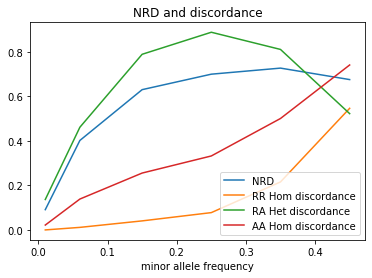

In [17]:
yaxis = mafnrd.columns[-4:]
mafnrd.plot(y=yaxis)
plt.title('NRD and discordance')
plt.show()

This does not look the same at all as in the article **Genotype imputation for genome-wide association studies** _(2010, J. Marchini and B. Howie)_, but in my case the amount of missing data depends on the MAF too (the higher the MAF, the more missing data due to pooling decoding power).
My results might definitely be interesting for detecting and imputing rare variant (lowest discordance rates).

If AF <= 0.5, Alt is the minor allele, otherwise Ref is the minor allele

In [13]:
mafgc = bcfqual.get_bin_maf_concordance(filestats)
mafgc

[['# GCsAF', '[2]id', '[3]allele frequency', '[4]RR Hom matches', '[5]RA Het matches', '[6]AA Hom matches', '[7]RR Hom mismatches', '[8]RA Het mismatches', '[9]AA Hom mismatches', '[10]dosage r-squared', '[11]number of genotypes'], ['GCsAF', '2', '0.010000', '305529793', '677773', '71', '8402', '107043', '13638', '0.873959', '366675600'], ['GCsAF', '2', '0.060000', '19229248', '920882', '9107', '215474', '776008', '117121', '0.403230', '21267840'], ['GCsAF', '2', '0.150000', '5978123', '394404', '13095', '212032', '1457278', '260588', '0.095257', '8315520'], ['GCsAF', '2', '0.250000', '2945202', '180424', '6720', '115156', '1559890', '402048', '0.025685', '5209440'], ['GCsAF', '2', '0.350000', '1580209', '247459', '17687', '173667', '1326571', '543367', '0.016730', '3888960'], ['GCsAF', '2', '0.450000', '607939', '577454', '85289', '416187', '814057', '616674', '0.011921', '3117600'], ['GCsAF', '2', '0.550000', '131625', '644144', '317512', '472990', '520073', '532536', '0.013388', '26

,RR Hom matches,RA Het matches,AA Hom matches,RR Hom mismatches,RA Het mismatches,AA Hom mismatches,number of genotypes,tot matches,tot mismatches,GC,RR Hom concordance,RA Het concordance,AA Hom concordance
minor allele frequency,,,,,,,,,,,,,
0.01,305529796.0,684128.0,621434.0,8517.0,108236.0,13889.0,367304880.0,306835358.0,130642.0,0.999574,0.999972,0.863401,0.978139
0.06,19229550.0,962388.0,782064.0,222206.0,823017.0,125815.0,22145040.0,20974002.0,1171038.0,0.947120,0.988577,0.539031,0.861419
0.15,5979924.0,453513.0,863025.0,252843.0,1690040.0,295855.0,9535200.0,7296462.0,2238738.0,0.765213,0.959433,0.211571,0.744706
0.25,2951854.0,260633.0,929006.0,248634.0,2054307.0,461806.0,6906240.0,4141493.0,2764747.0,0.599674,0.922314,0.112587,0.667959
0.35,1595156.0,449099.0,703506.0,438044.0,1917846.0,704109.0,5807760.0,2747761.0,3059999.0,0.473119,0.784554,0.189738,0.499786
0.45,739564.0,1221598.0,402801.0,889177.0,1334130.0,1149210.0,5736480.0,2363963.0,3372517.0,0.412093,0.454071,0.477984,0.259535


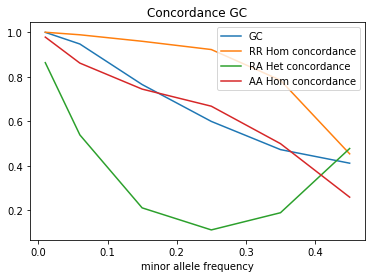

In [14]:
yaxis = mafgc.columns[-4:]
mafgc.plot(y=yaxis)
plt.title('Concordance GC')
plt.show()